In [17]:
import matplotlib.pyplot as plt  # Ensure to import this for plotting
import mne  # Ensure to import mne

def calculate_and_plot_erf(epochs, event_id=None, title=None, filename=None):
    """
    Calculate and plot the Event-Related Field (ERF) for specified epochs 
    along with separate Global Field Powers (GFP) for magnetometers and 
    gradiometers.

    Parameters
    ----------
    epochs : mne.Epochs
        The epoched data.
    event_id : int or str, optional
        The id of the event for which to compute the ERF. 
        If None (default), all epochs will be used.
    title : str, optional
        The title to be added on top of the plots. 
        If None (default), no title will be added.
    filename : str or Path, optional
        The path and filename where the plot should be saved. 
        If None (default), the plot won't be saved, but only displayed.
    """
    if event_id is not None:
        # Compute ERF for specific event type
        erf = epochs[event_id].average()
    else:
        # Compute ERF using all epochs
        erf = epochs.average()

    # Separate data for magnetometers and gradiometers
    erf_mag = erf.copy().pick_types(meg='mag')
    erf_grad = erf.copy().pick_types(meg='grad')

    # Calculate GFP for magnetometers and gradiometers
    gfp_mag = erf_mag.data.std(axis=0, ddof=0)
    gfp_grad = erf_grad.data.std(axis=0, ddof=0)
   
    # Create subplots: 2 for GFPs, 2 for the ERFs of mag and grad
    fig, axs = plt.subplots(4, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 2, 1, 2]})

    # Add a title if provided
    if title is not None:
        fig.suptitle(title, fontsize=16, y=1.02)

    # Plot GFP for magnetometers
    axs[0].plot(erf.times, gfp_mag, label='GFP (mag)', color='b')
    axs[0].set_title('Global Field Power (GFP) - Magnetometers')
    axs[0].legend()
    
    # Plot ERF for magnetometers
    erf_mag.plot(axes=axs[1], show=False, spatial_colors=True, titles='ERF - Magnetometers')
    
    # Plot GFP for gradiometers
    axs[2].plot(erf.times, gfp_grad, label='GFP (grad)', color='r')
    axs[2].set_title('Global Field Power (GFP) - Gradiometers')
    axs[2].legend()

    # Plot ERF for gradiometers
    erf_grad.plot(axes=axs[3], show=True, spatial_colors=True, titles='ERF - Gradiometers')

    if filename:
        plt.savefig(filename, dpi=300)  # Save the figure before calling plt.show()
    plt.show()

    return erf

def get_event_name(event_dict, event_id_to_find):
    """
    Get event name corresponding to a provided event id.

    Parameters
    ----------
    event_dict : dict
        Dictionary mapping event names to event ids.
    event_id_to_find : int
        The event id for which to find the corresponding name.

    Returns
    -------
    str
        The name of the event corresponding to event_id_to_find.
        Returns None if the event_id is not found.
    """
    for name, id in event_dict.items():
        if id == event_id_to_find:
            return name
    return None  # or some default value if preferred


Opening raw data file /work/834761/0108/20230928_000000/MEG/001.self_block1/files/self_block1.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 74000 ... 452999 =     74.000 ...   452.999 secs
Ready.
Reading 0 ... 378999  =      0.000 ...   378.999 secs...


/work/PernilleHøjlundBrams#8577/notebooks_PHB/MEG_portfolio/utils.py:29: RuntimeWarning: This filename (/work/834761/0108/20230928_000000/MEG/001.self_block1/files/self_block1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_path, preload = True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 306 out of 306 | elapsed:    3.2s finished


Reading /work/study_group_8/ICA/0108/001.self_block1-ica.fif ...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
Now restoring ICA solution ...
Ready.
Applying ICA to Raw instance
    Transforming to ICA space (203 components)
    Zeroing out 3 ICA components
    Projecting back using 305 PCA components
158 events found
Event IDs: [ 11  12  23 202]
Not setting metadata
158 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (su

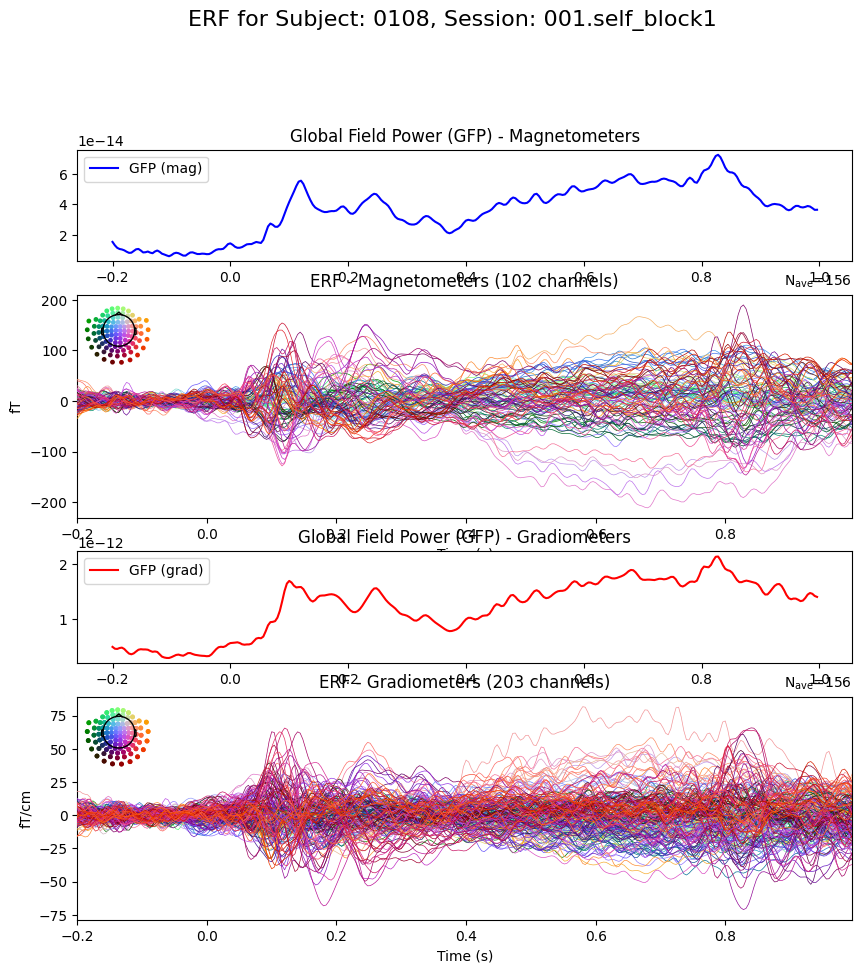

<Figure size 640x480 with 0 Axes>

Opening raw data file /work/834761/0108/20230928_000000/MEG/002.other_block1/files/other_block1.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 69000 ... 451999 =     69.000 ...   451.999 secs
Ready.
Reading 0 ... 382999  =      0.000 ...   382.999 secs...


/work/PernilleHøjlundBrams#8577/notebooks_PHB/MEG_portfolio/utils.py:29: RuntimeWarning: This filename (/work/834761/0108/20230928_000000/MEG/002.other_block1/files/other_block1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_path, preload = True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    0.7s


Reading /work/study_group_8/ICA/0108/002.other_block1-ica.fif ...


[Parallel(n_jobs=4)]: Done 306 out of 306 | elapsed:    3.4s finished


    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
Now restoring ICA solution ...
Ready.
Applying ICA to Raw instance
    Transforming to ICA space (202 components)
    Zeroing out 3 ICA components
    Projecting back using 305 PCA components
162 events found
Event IDs: [ 21  22  23 103 202]
Not setting metadata
162 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data

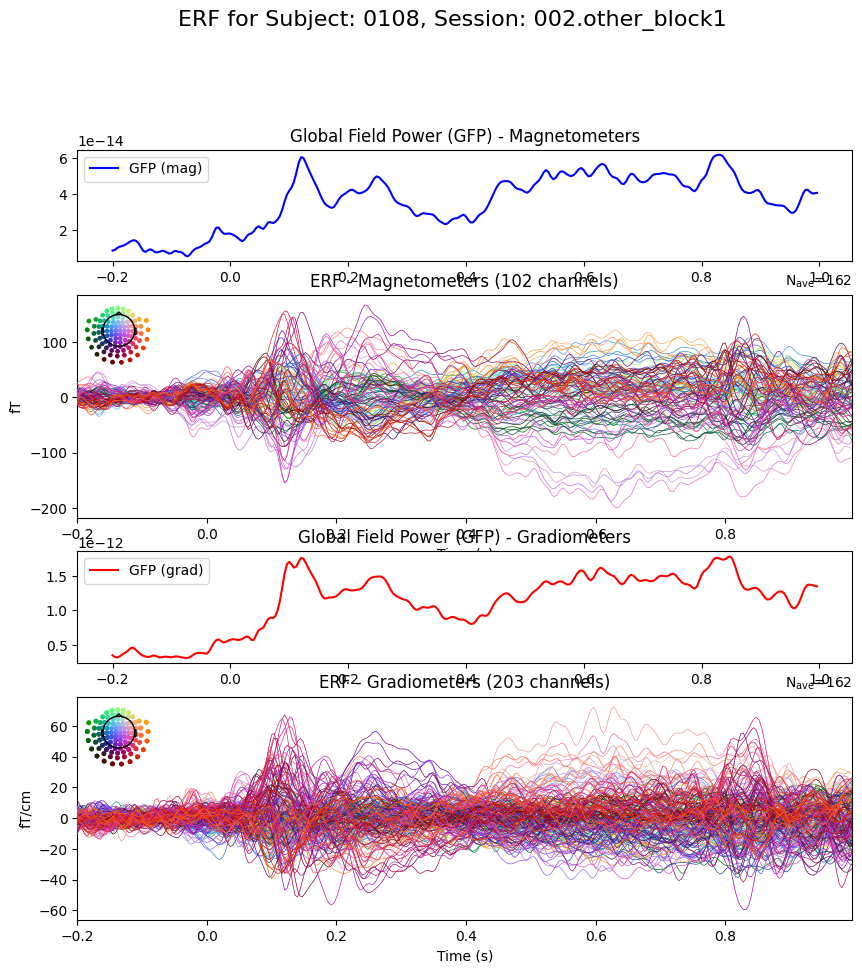

<Figure size 640x480 with 0 Axes>

Opening raw data file /work/834761/0108/20230928_000000/MEG/003.self_block2/files/self_block2.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 45000 ... 422999 =     45.000 ...   422.999 secs
Ready.
Reading 0 ... 377999  =      0.000 ...   377.999 secs...


/work/PernilleHøjlundBrams#8577/notebooks_PHB/MEG_portfolio/utils.py:29: RuntimeWarning: This filename (/work/834761/0108/20230928_000000/MEG/003.self_block2/files/self_block2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_path, preload = True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    0.7s


Reading /work/study_group_8/ICA/0108/003.self_block2-ica.fif ...


[Parallel(n_jobs=4)]: Done 306 out of 306 | elapsed:    3.2s finished


    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
Now restoring ICA solution ...
Ready.
Applying ICA to Raw instance
    Transforming to ICA space (188 components)
    Zeroing out 3 ICA components
    Projecting back using 305 PCA components
161 events found
Event IDs: [ 11  12  23 103 202]
Not setting metadata
161 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data

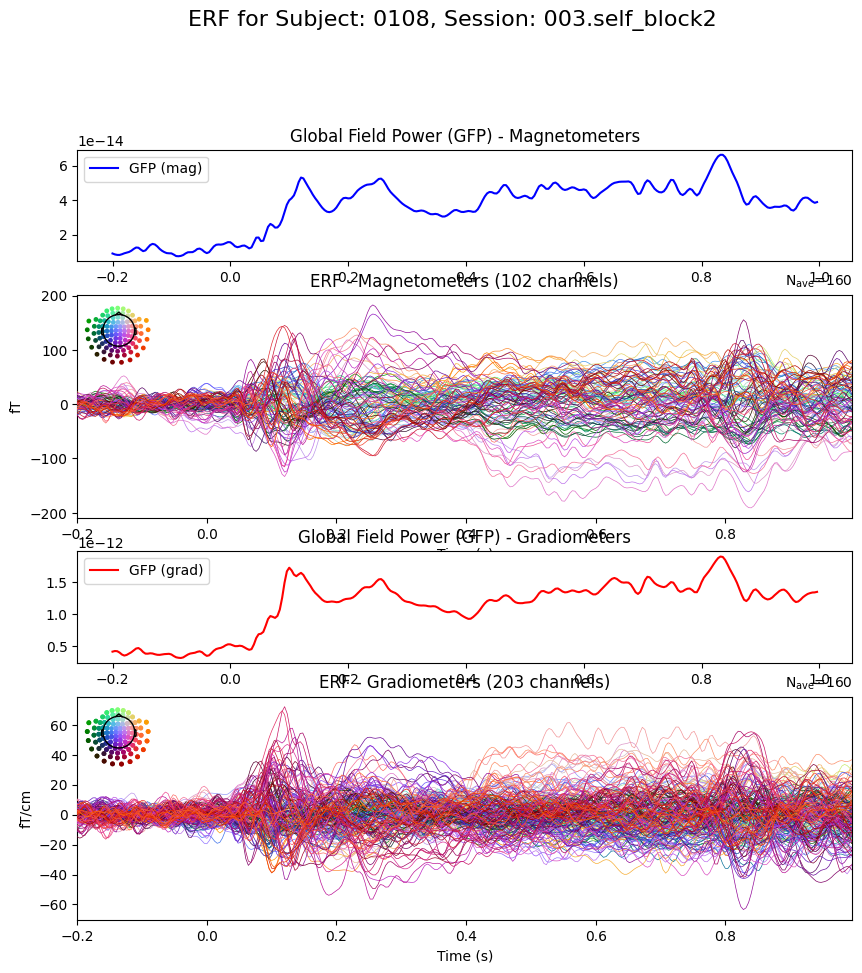

<Figure size 640x480 with 0 Axes>

Opening raw data file /work/834761/0108/20230928_000000/MEG/004.other_block2/files/other_block2.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 48000 ... 426999 =     48.000 ...   426.999 secs
Ready.
Reading 0 ... 378999  =      0.000 ...   378.999 secs...


/work/PernilleHøjlundBrams#8577/notebooks_PHB/MEG_portfolio/utils.py:29: RuntimeWarning: This filename (/work/834761/0108/20230928_000000/MEG/004.other_block2/files/other_block2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_path, preload = True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    0.7s


Reading /work/study_group_8/ICA/0108/004.other_block2-ica.fif ...


[Parallel(n_jobs=4)]: Done 306 out of 306 | elapsed:    3.2s finished


    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
Now restoring ICA solution ...
Ready.
Applying ICA to Raw instance
    Transforming to ICA space (189 components)
    Zeroing out 3 ICA components
    Projecting back using 305 PCA components
160 events found
Event IDs: [ 21  22  23 103 202]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data

KeyboardInterrupt: 

In [18]:
from pathlib import Path
import mne
import numpy as np
import json
import sys  # Ensure sys is imported

# Assuming notebook is located in: /work/name/notebooks_PHB/MEG_portfolio/sanity_checks/
# Define a static path to where the notebook is located
notebook_path = Path("/work/PernilleHøjlundBrams#8577/notebooks_PHB/MEG_portfolio/sanity_checks")

# Add the utils module path to sys.path to import preprocess_data_sensorspace
sys.path.append(str(notebook_path.parents[0]))  # Adding the parent directory to sys.path
from utils import preprocess_data_sensorspace

# Define other paths
MEG_data_path = Path("/work/834761")
ICA_path = Path("/work/study_group_8/ICA")  # Adjusting according to your folder structure
plot_path = notebook_path / "plots"

# Make sure plot_path exists
if not plot_path.exists():
    plot_path.mkdir(parents=True)

# Read session info
with open('/work/PernilleHøjlundBrams#8577/notebooks_PHB/MEG_portfolio/session_info.txt', 'r') as f:
    session_info = json.loads(f.read())

subjects = ["0108", "0109", "0110", "0111", "0112", "0113", "0114", "0115"]
recording_names = [
    '001.self_block1',  '002.other_block1', '003.self_block2',
    '004.other_block2', '005.self_block3',  '006.other_block3'
]

for subject in subjects:
    subject_info = session_info[subject]
    reject = subject_info["reject"]

    subject_path = MEG_data_path / subject
    subject_meg_path = list(subject_path.glob("*_000000"))[0]

    for recording_name in recording_names:
        subject_session_info = subject_info[recording_name]
        fif_file_path = list((subject_meg_path / "MEG" / recording_name / "files").glob("*.fif"))[0]
        plot_filename = plot_path / f"{subject}-{recording_name}.png"

        ICA_path_sub = ICA_path / subject / f"{recording_name}-ica.fif"

        epochs = preprocess_data_sensorspace(
            fif_file_path,
            subject_session_info["bad_channels"],
            reject,
            ICA_path_sub,
            subject_session_info["noise_components"]
        )

        # plotting and saving plot logic here:
        
        # Formulate a meaningful title for the plot
        title = f"ERF for Subject: {subject}, Session: {recording_name}"
        
        # Construct filename to save the plot
        filename = plot_path / f"{subject}_{recording_name}_ERF_plot.png"
        
        # Assuming `epochs` is computed somewhere in your code block before this
        calculate_and_plot_erf(epochs, event_id=None, title=title, filename=filename)
        